In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.6 MB/s eta 0:00:00


In [2]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.svm import SVR

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from catboost import CatBoostRegressor

from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
import io

import tensorflow as tf
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers

print('TensorFlow Version: ', tf.__version__)

pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

TensorFlow Version:  2.9.2


In [3]:
## Importing Dataset

from google.colab import files
uploaded = files.upload()

Saving CarPrice.csv to CarPrice.csv


In [4]:
cars = pd.read_csv(io.BytesIO(uploaded['CarPrice.csv']))
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
## EDA

cars.describe(include='all').style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,nan,nan,147,2,2,2,5,3,2,nan,nan,nan,nan,nan,7,7,nan,8,nan,nan,nan,nan,nan,nan,nan,nan
top,nan,nan,toyota corona,gas,std,four,sedan,fwd,front,nan,nan,nan,nan,nan,ohc,four,nan,mpfi,nan,nan,nan,nan,nan,nan,nan,nan
freq,nan,nan,6,185,168,115,96,120,202,nan,nan,nan,nan,nan,148,159,nan,94,nan,nan,nan,nan,nan,nan,nan,nan
mean,103.000000,0.834146,nan,nan,nan,nan,nan,nan,nan,98.756585,174.049268,65.907805,53.724878,2555.565854,nan,nan,126.907317,nan,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,nan,nan,nan,nan,nan,nan,nan,6.021776,12.337289,2.145204,2.443522,520.680204,nan,nan,41.642693,nan,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,nan,nan,nan,nan,nan,nan,nan,86.600000,141.100000,60.300000,47.800000,1488.000000,nan,nan,61.000000,nan,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,nan,nan,nan,nan,nan,nan,nan,94.500000,166.300000,64.100000,52.000000,2145.000000,nan,nan,97.000000,nan,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,nan,nan,nan,nan,nan,nan,nan,97.000000,173.200000,65.500000,54.100000,2414.000000,nan,nan,120.000000,nan,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,nan,nan,nan,nan,nan,nan,nan,102.400000,183.100000,66.900000,55.500000,2935.000000,nan,nan,141.000000,nan,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


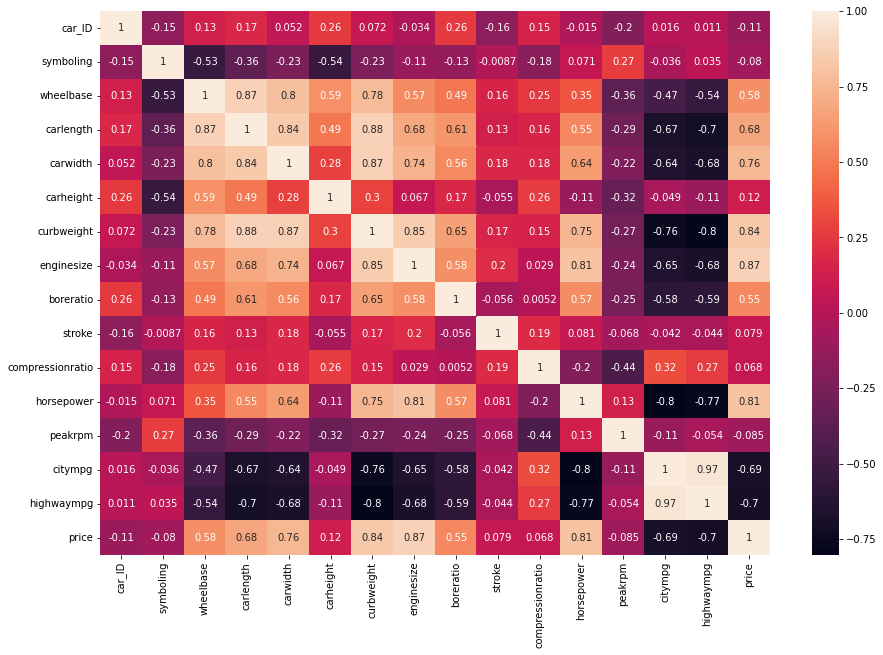

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(cars.corr(),annot=True)
plt.show()

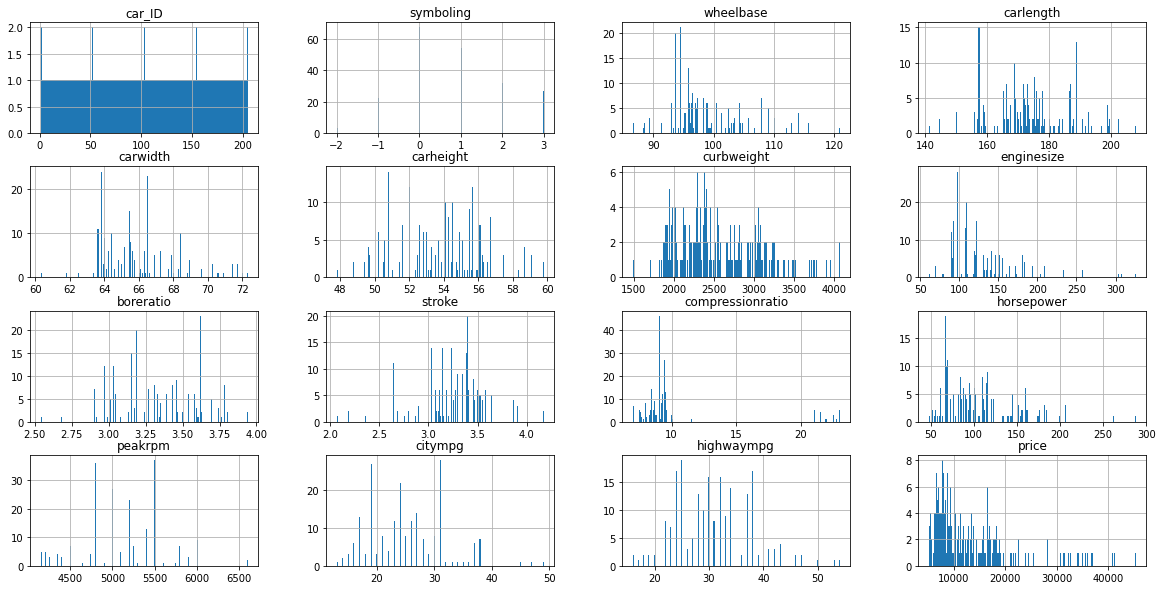

In [8]:
cars.hist(bins=200,figsize=[20,10])
plt.show()

In [9]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

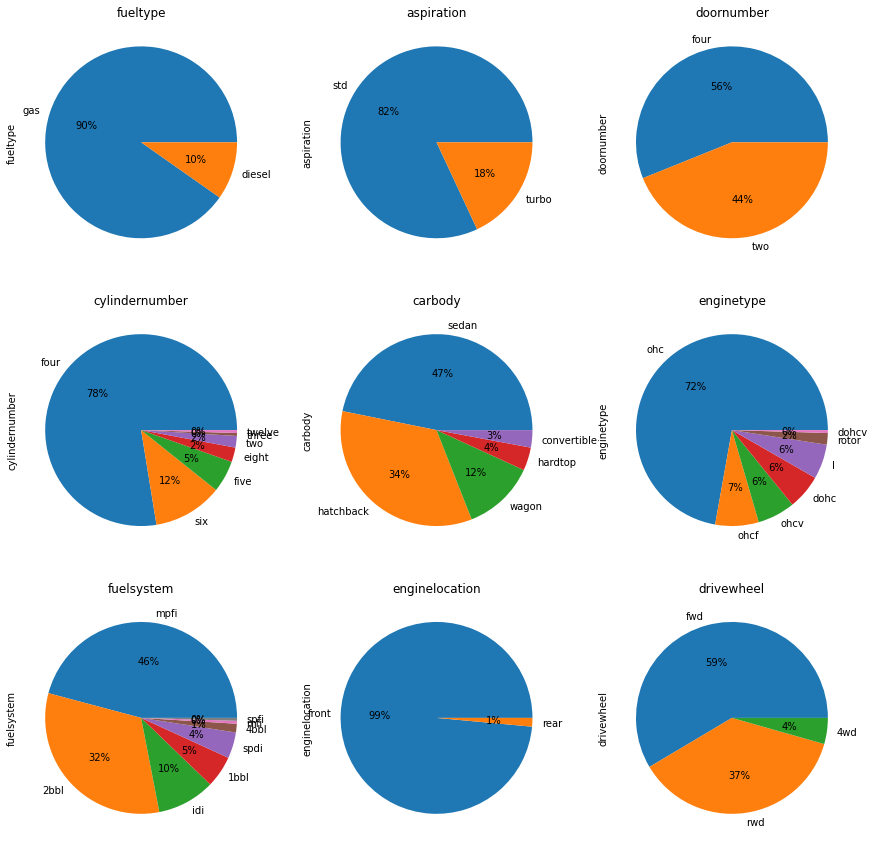

In [10]:
pie_plot(cars, ['fueltype', 'aspiration', 'doornumber', 'cylindernumber', 'carbody', 'enginetype', 
              'fuelsystem', 'enginelocation', 'drivewheel'], 3, 3)
plt.show()

In [11]:
cars = cars.drop(['car_ID','CarName','fueltype','enginelocation','citympg'], axis=1)
cars.head()

,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
0,3,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,13495.0
1,3,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,27,16500.0
2,1,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,26,16500.0
3,2,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,30,13950.0
4,2,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,22,17450.0


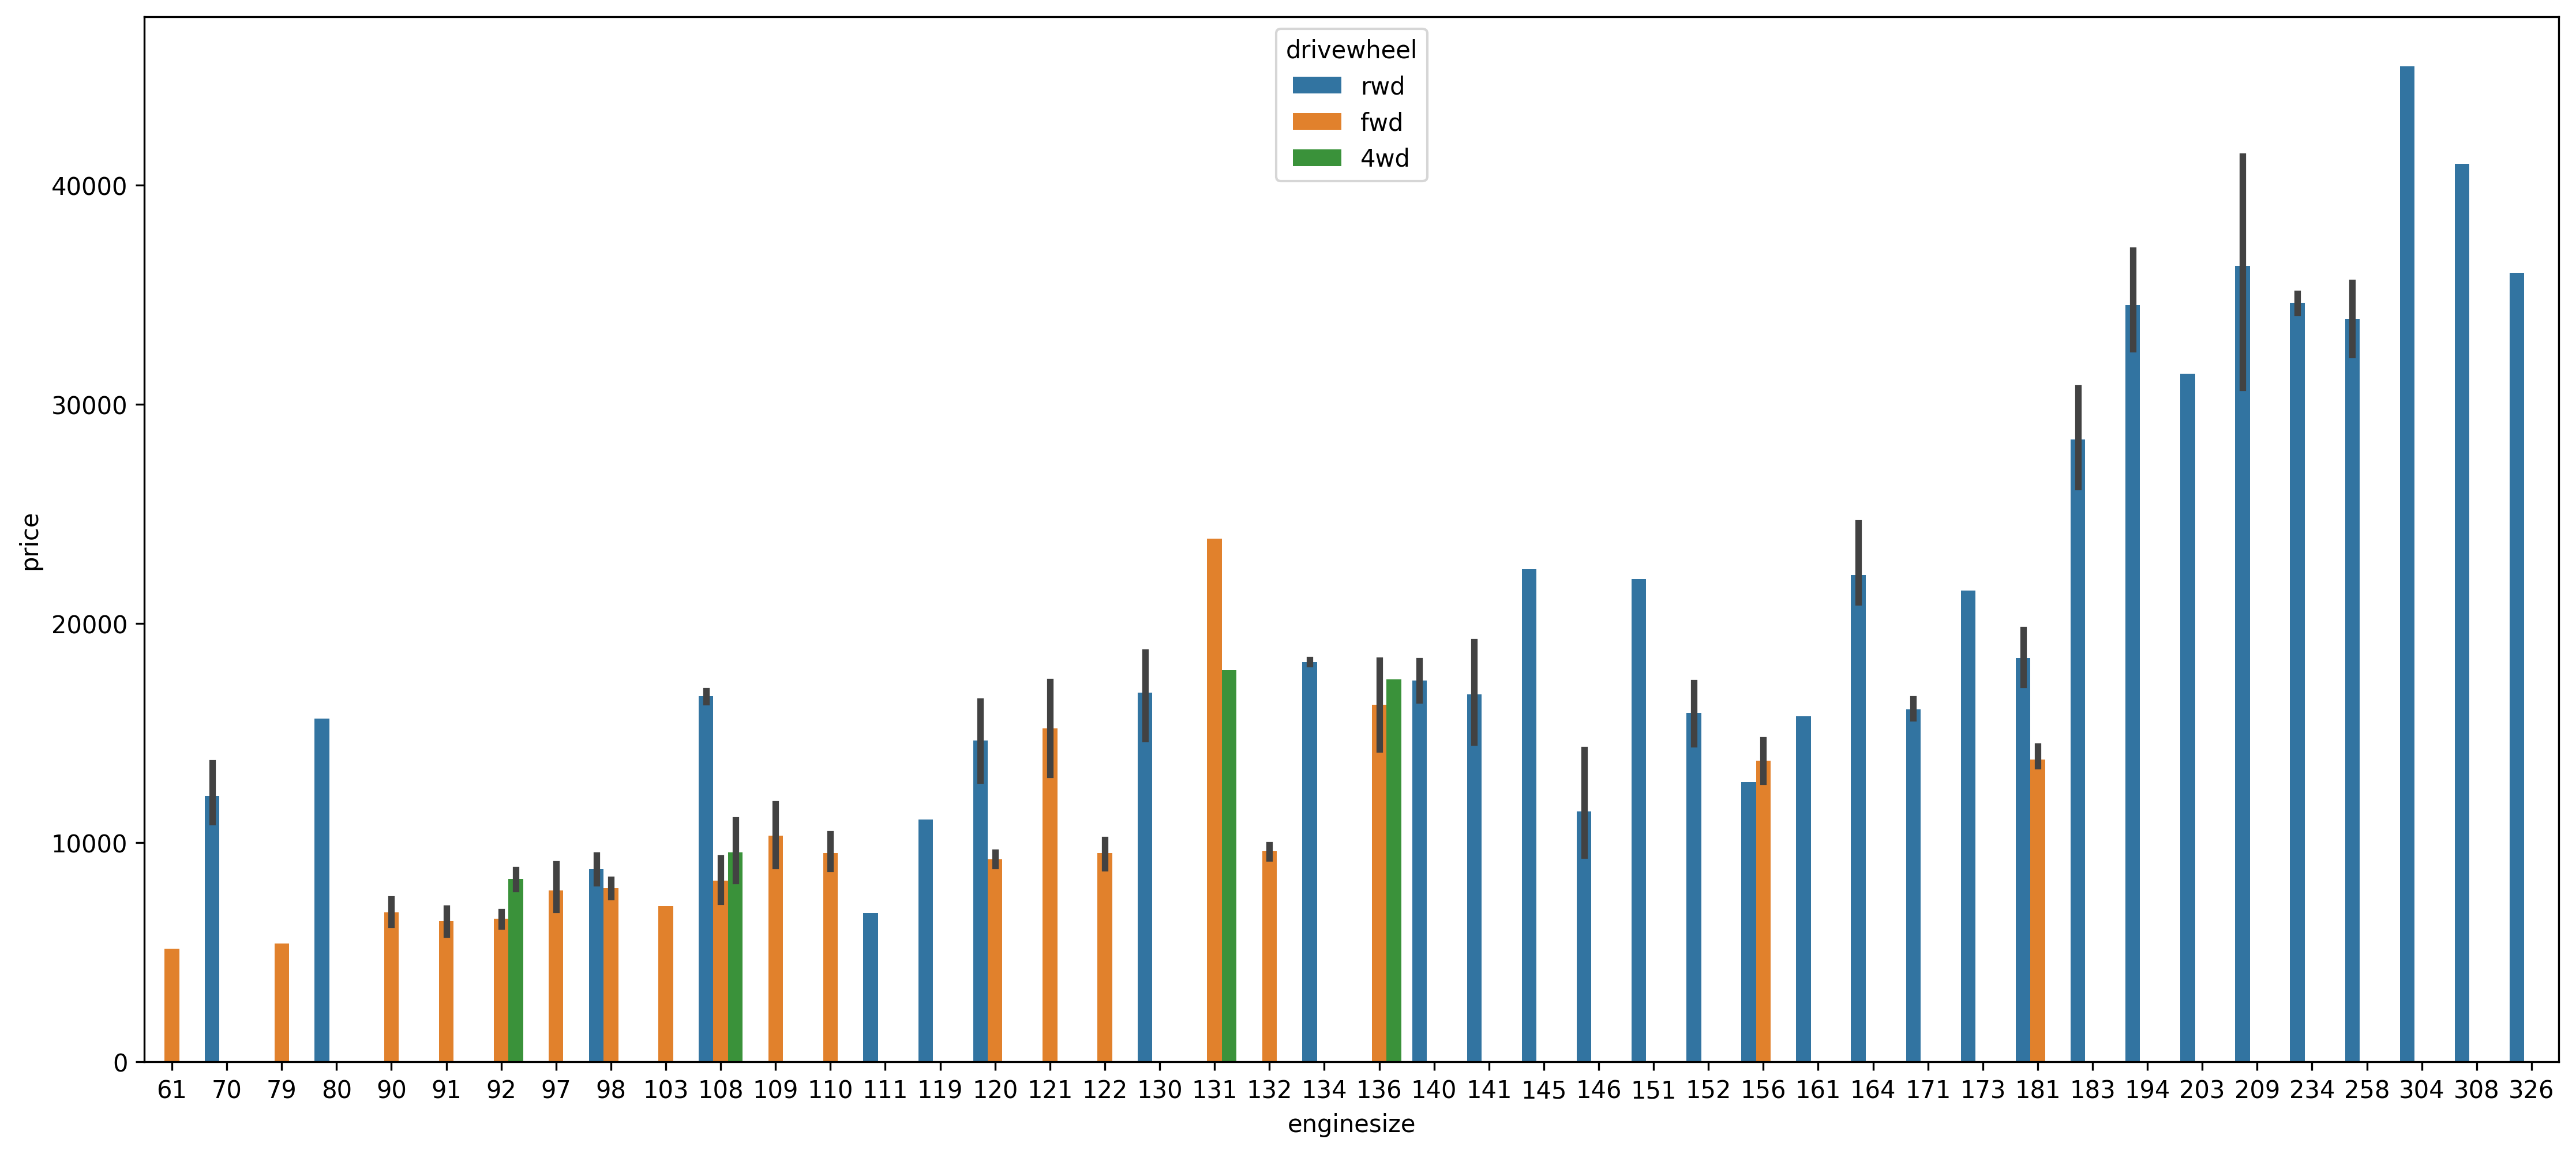

In [12]:
plt.figure(figsize=(18,8),dpi=300)
sns.barplot(data=cars, x="enginesize", y="price", hue="drivewheel")
plt.show()

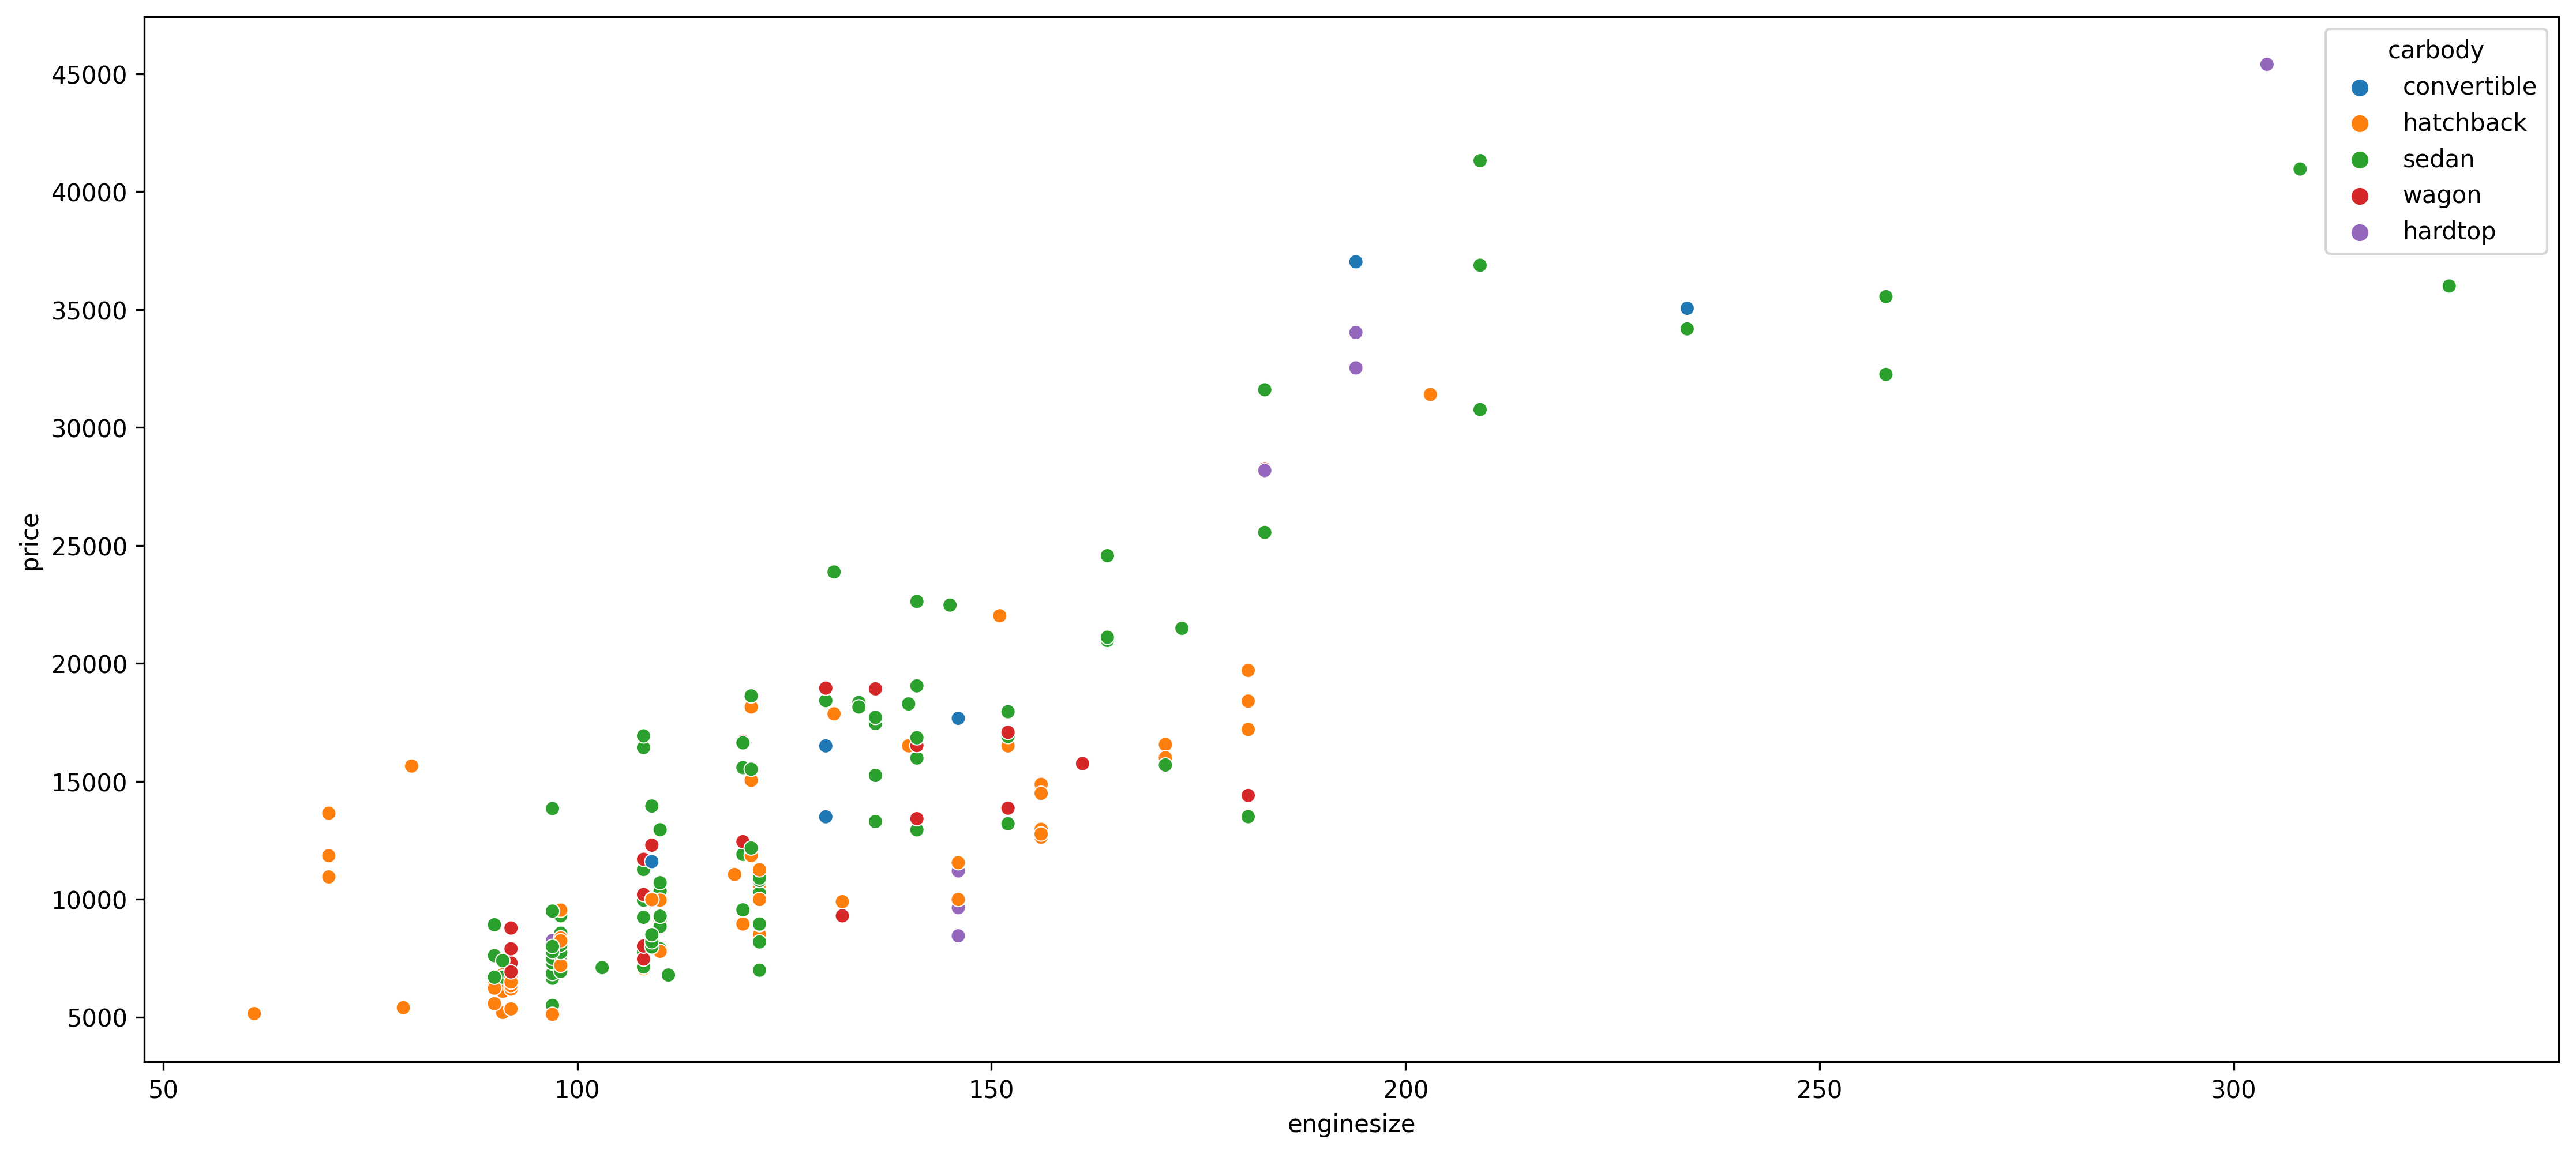

In [13]:
plt.figure(figsize=(18,8),dpi=300)
sns.scatterplot(data=cars, x="enginesize", y="price", hue='carbody')
plt.show()

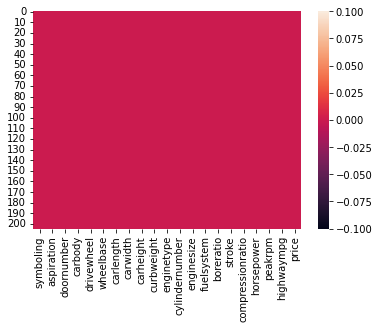

In [14]:
## Null Values

sns.heatmap(cars.isnull())
plt.show()

The heatmap clearly shows there are no missing values in our dataset

In [15]:
## Checking for Duplicates

cars.duplicated().sum()

1

Our Dataset contains only 1 duplicates.

In [16]:
## Encoding the Categorical Variables

df = cars.copy()

In [17]:
df['doornumber'].replace({'two':2, 'four':4}, inplace=True)
df['cylindernumber'].replace({'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}, inplace=True)

In [18]:
df = pd.get_dummies(df, columns = ['aspiration', 'carbody', 'drivewheel','enginetype', 'fuelsystem'])
df.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,27,13495.0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,27,16500.0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,26,16500.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,30,13950.0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,22,17450.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [19]:
cars.shape

(205, 21)

In [20]:
df.shape

(205, 41)

The number of variables increased from 21 to 41.

**Dealing with Outliers**

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations. Two activities are essential for characterizing a set of data:

* Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions.

* Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots, along with an analytic procedure for detecting outliers when the distribution is normal (Grubbs' Test)

In [21]:
def box_plot(num_cols):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df[l], palette="autumn")

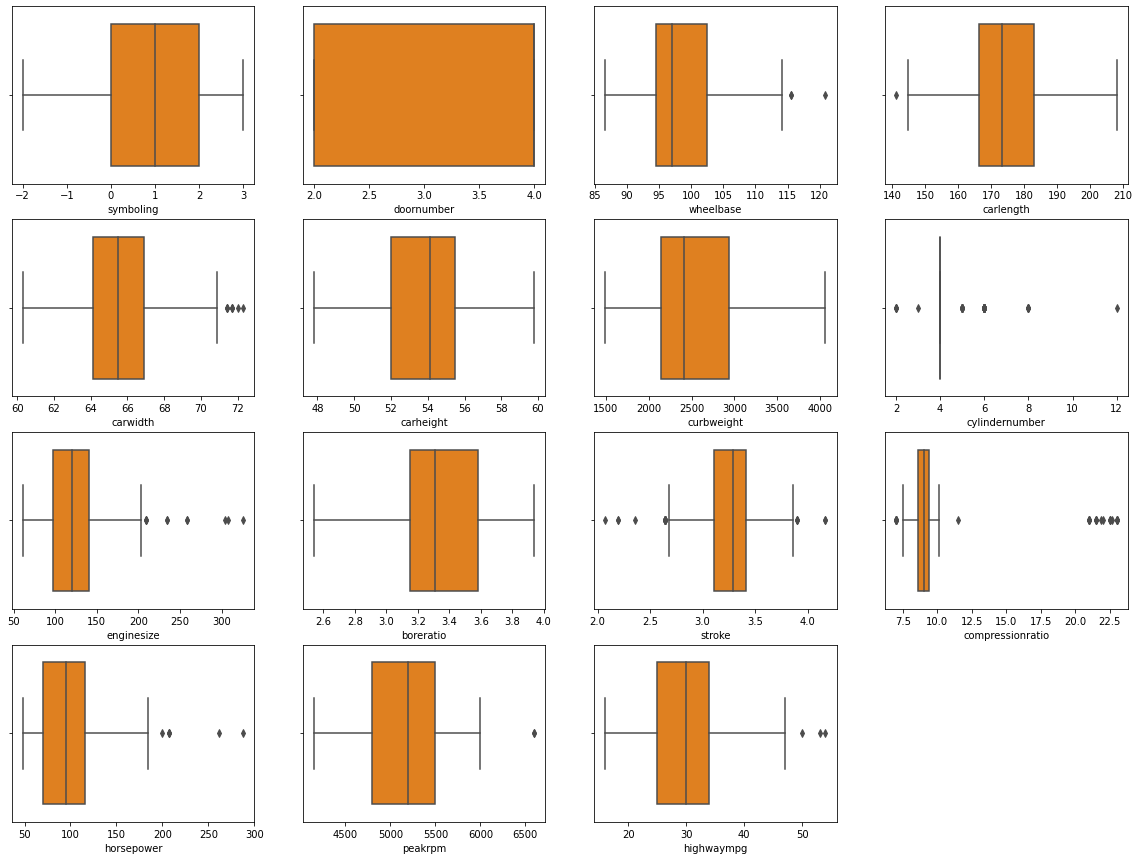

In [22]:
box_plot(['symboling','doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','cylindernumber', 
          'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg'])
plt.show()

Don't get confused about the outliers in the dataset as they are happenning due to exotic cars for special tasks with high performance so we will not be discarding them.

In [23]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

**Regression - Statistics Approach**

In [24]:
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     54.58
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           7.10e-75
Time:                        12:09:30   Log-Likelihood:                -1875.2
No. Observations:                 205   AIC:                             3822.
Df Residuals:                     169   BIC:                             3942.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.342e+04   7096.638     -3.300      0.001   -3.74e+04   -9407.804
symboling             299.7947    254.600      1.178      0.241    -202.811     802.401
doornumber            348.9474    320.038      1.090      0.277    -282.840     980.735
wheelbase              32.1951    106.928      0.301      0.764    -178.891     243.281
carlength             -44.4168     54.347     -0.817      0.415    -151.703      62.870
carwidth              585.8183    241.440      2.426      0.016     109.192    1062.444
carheight             400.1510    136.883      2.923      0.004     129.930     670.372
curbweight              2.9596      1.862      1.589      0.114      -0.717       6.636
cylindernumber        396.6853    721.693      0.550      0.583   -1028.010    1821.381
enginesize            155.0130     27.432      5.651      0.000     100.859     209.167
boreratio           -4971.1990   1697.573     -2.928      0.004   -8322.378   -1620.020
stroke              -3715.4349    971.201     -3.826      0.000   -5632.683   -1798.186
compressionratio    -1408.4022    474.115     -2.971      0.003   -2344.353    -472.451
horsepower             24.2146     20.581      1.177      0.241     -16.414      64.844
peakrpm                 3.1714      0.656      4.835      0.000       1.877       4.466
highwaympg            193.4907     76.144      2.541      0.012      43.174     343.807
aspiration_std      -1.237e+04   3589.385     -3.445      0.001   -1.95e+04   -5279.879
aspiration_turbo    -1.105e+04   3567.932     -3.097      0.002   -1.81e+04   -4008.140
carbody_convertible  -790.3131   1579.966     -0.500      0.618   -3909.324    2328.698
carbody_hardtop     -4481.8715   1686.775     -2.657      0.009   -7811.736   -1152.007
carbody_hatchback   -5765.9252   1497.680     -3.850      0.000   -8722.496   -2809.355
carbody_sedan       -5391.3345   1577.264     -3.418      0.001   -8505.013   -2277.656
carbody_wagon       -6987.8364   1708.011     -4.091      0.000   -1.04e+04   -3616.051
drivewheel_4wd      -8948.6289   2410.485     -3.712      0.000   -1.37e+04   -4190.089
drivewheel_fwd      -8338.5799   2521.622     -3.307      0.001   -1.33e+04   -3360.644
drivewheel_rwd      -6130.0719   2407.691     -2.546      0.012   -1.09e+04   -1377.049
enginetype_dohc     -5841.5016   1294.840     -4.511      0.000   -8397.646   -3285.357
enginetype_dohcv    -5435.4627   3727.362     -1.458      0.147   -1.28e+04    1922.724
enginetype_l        -5765.7000   1528.934     -3.771      0.000   -8783.970   -2747.430
enginetype_ohc      -2506.2208   1275.402     -1.965      0.051   -5023.993      11.551
enginetype_ohcf      -884.2153   1368.459     -0.646      0.519   -3585.692    1817.261
enginetype_ohcv     -9772.8095   1492.904     -6.546      0.000   -1.27e+04   -6825.667
eng

In [25]:
error = lr.resid
mse = np.mean(error**2)
rmse = np.sqrt(mse)
rmse

2272.0370770361337

#### Conclusion from Summary:

1. We are not considering the p values significance for the categorically encoded variables.
2. Variables like symboling, wheelbase, carlength, cylindernumber, horsepower and citympg have high p values signifying that these variables are unreliable.
3. The Adj R squared value is coming as 0.902 and the RMSE is $2272. 
4. We will have to see how the machine learning assumptions fair up against this. Also, how the ensemble machine learning techniques perform will be exciting to analyze.

### Assumptions of Linear Regression

### 1. Multicollinearity

Greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity.

In [26]:
vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index=Xc.columns, columns=['VIF']).head(18)

,VIF
const,0.000000
symboling,3.274930
doornumber,3.303331
wheelbase,13.507040
carlength,14.646145
carwidth,8.739495
carheight,3.644718
curbweight,30.633531
cylindernumber,19.823101
enginesize,42.513772


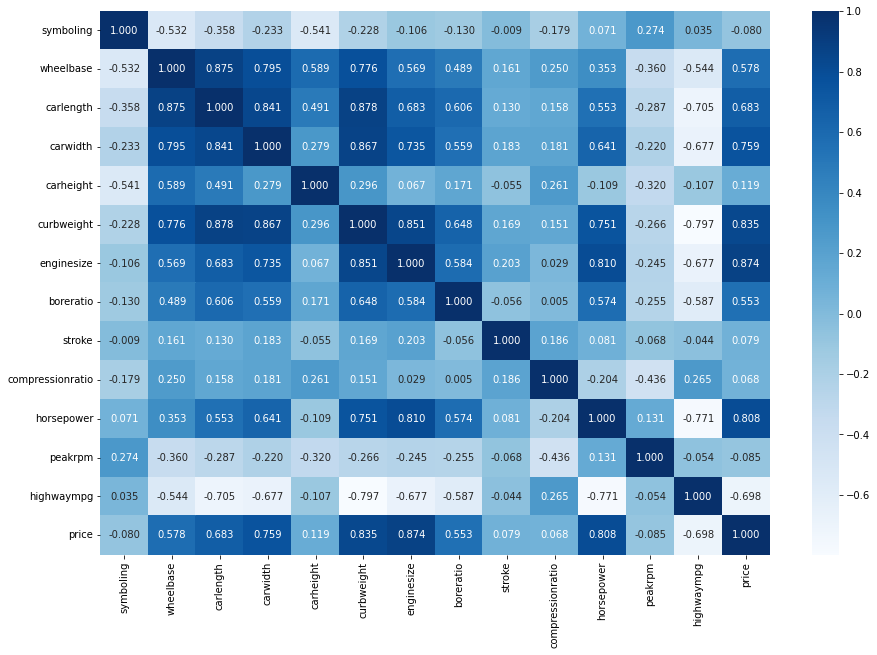

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(cars.corr(),annot=True, cmap='Blues',fmt='.3f')
plt.show()

We can't discard features like compression ratio as it indicates combustion efficeincy of an engine so for this while modeling we'll be using techniques like PCA later to deal with multicolinearity.

### 2. Linearity of the relationship

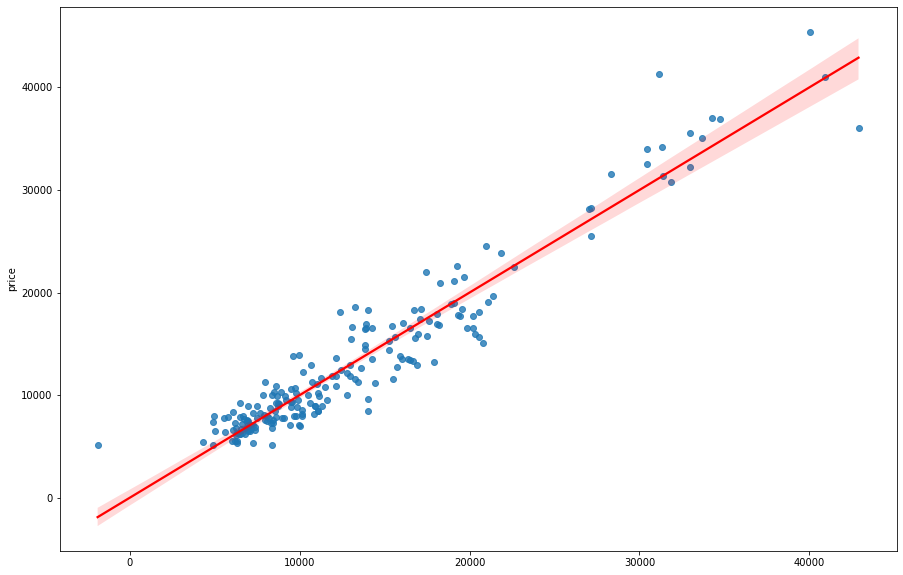

In [28]:
pred = lr.predict()
plt.figure(figsize=(15,10))
sns.regplot(x=pred, y=y, line_kws={'color':'red'})
plt.show()

In [29]:
fstat, pvalue = sm.stats.diagnostic.linear_rainbow(lr)
print("The p-value is: ",pvalue)

The p-value is:  5.236003170244699e-09


The pvalue is above 0.05, hence we can conclude that our Null Hypothesis is true which is the fit of the model using full sample is the same as using a central subset and hence a Linear regression model can be built.

### 3. Normality of the residuals

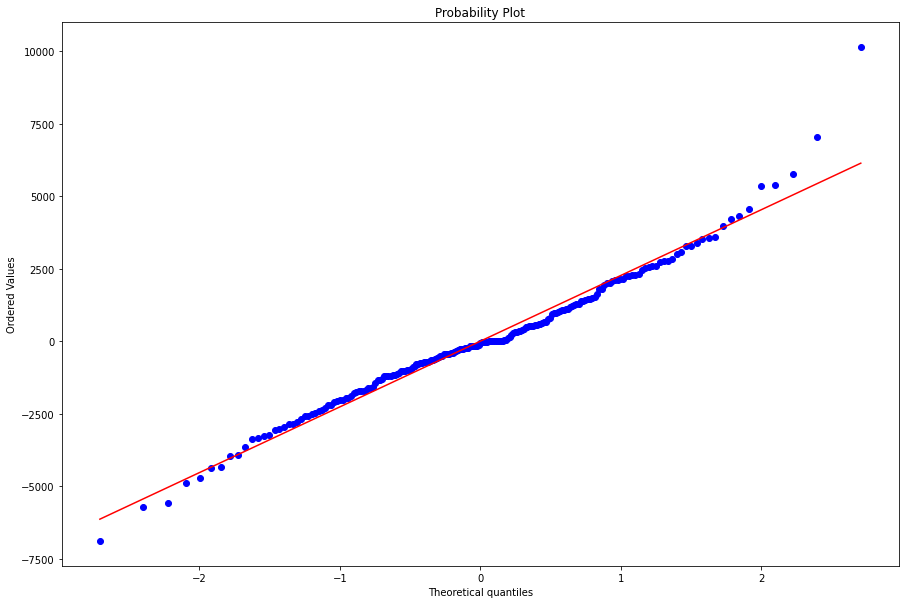

In [30]:
plt.figure(figsize=(15,10))
stats.probplot(lr.resid, plot=plt)
plt.show()

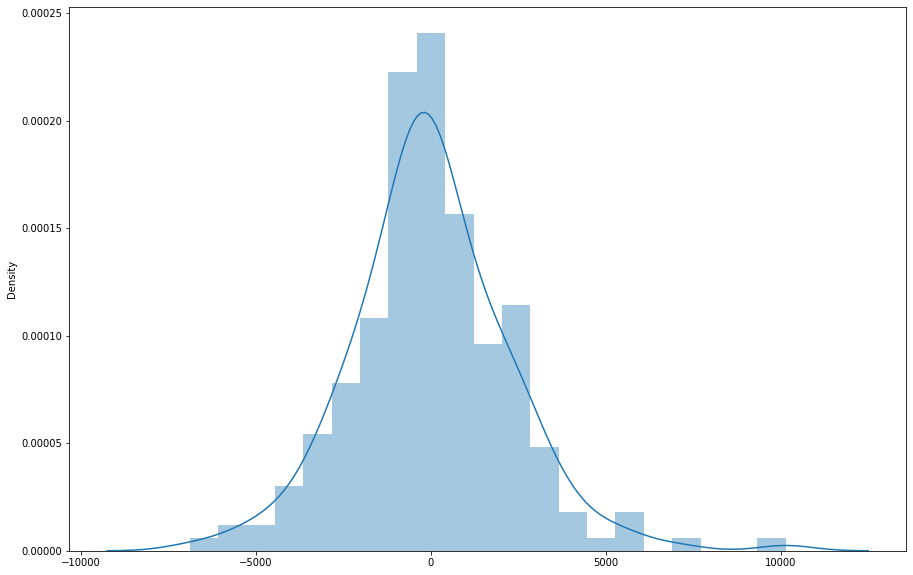

In [31]:
plt.figure(figsize=(15,10))
sns.distplot(lr.resid)
plt.show()

In [32]:
stat, pvalue = stats.jarque_bera(lr.resid)

print("The p-value is: ",pvalue)

The p-value is:  2.4695259170925965e-09


The pvalue is much below the significance level. Hence the residuals are not normally distributed and we need to normalize it before proceeding further.

### 4. Homoscedasticity

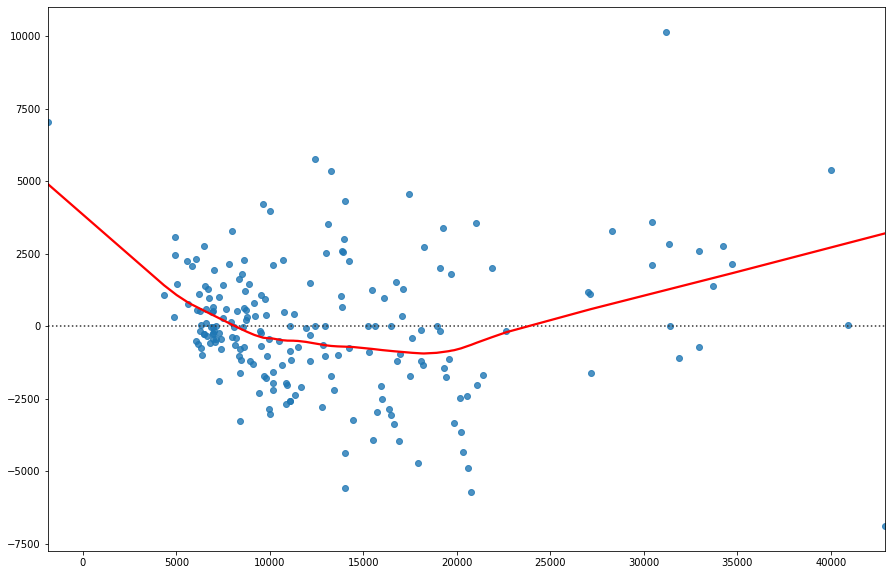

In [33]:
plt.figure(figsize=(15,10))
sns.residplot(lr.predict(), lr.resid, lowess=True, line_kws={'color':'red'})
plt.show()

In [34]:
fval, pval, res = sms.het_goldfeldquandt(lr.resid, Xc)

print("The p-value is: ",pval)

The p-value is:  0.16729615224399474


As the pvalue is above the significance level, hence we conclude that we fail to reject the null hypothesis which is the variance of errors is constant across the range of data.

### 5. Autocollinearity

The Durbin Watson value of 1.580 in the model summary shows that there is no Autocollinearity.

#### Linear Regression with Revised Variables

In [35]:
Xc = sm.add_constant(X.drop(['wheelbase', 'compressionratio'], axis=1))
model = sm.OLS(y, Xc)
lr = model.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     55.36
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           9.35e-75
Time:                        12:09:32   Log-Likelihood:                -1880.5
No. Observations:                 205   AIC:                             3829.
Df Residuals:                     171   BIC:                             3942.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.639e+04   7168.631     -3.681      0.000   -4.05e+04   -1.22e+04
symboling             168.0226    233.954      0.718      0.474    -293.788     629.833
doornumber            300.2864    326.051      0.921      0.358    -343.317     943.890
carlength             -54.1433     52.868     -1.024      0.307    -158.501      50.215
carwidth              644.4653    228.831      2.816      0.005     192.768    1096.163
carheight             434.0492    129.239      3.358      0.001     178.940     689.159
curbweight              2.5340      1.894      1.338      0.183      -1.204       6.272
cylindernumber       -378.8451    687.196     -0.551      0.582   -1735.324     977.634
enginesize            178.0646     25.683      6.933      0.000     127.368     228.761
boreratio           -6125.3402   1680.490     -3.645      0.000   -9442.517   -2808.163
stroke              -3301.9595    979.568     -3.371      0.001   -5235.561   -1368.358
horsepower             22.8028     18.872      1.208      0.229     -14.450      60.056
peakrpm                 2.8985      0.657      4.414      0.000       1.602       4.195
highwaympg            113.7795     72.745      1.564      0.120     -29.815     257.374
aspiration_std      -1.424e+04   3604.779     -3.950      0.000   -2.14e+04   -7124.273
aspiration_turbo    -1.215e+04   3618.897     -3.356      0.001   -1.93e+04   -5002.828
carbody_convertible -1247.1438   1582.680     -0.788      0.432   -4371.250    1876.963
carbody_hardtop     -5492.4640   1685.470     -3.259      0.001   -8819.470   -2165.458
carbody_hatchback   -6248.9985   1511.660     -4.134      0.000   -9232.915   -3265.082
carbody_sedan       -5858.2744   1598.384     -3.665      0.000   -9013.379   -2703.169
carbody_wagon       -7539.2787   1732.248     -4.352      0.000    -1.1e+04   -4119.936
drivewheel_4wd      -9573.5349   2444.692     -3.916      0.000   -1.44e+04   -4747.875
drivewheel_fwd      -9486.5922   2542.520     -3.731      0.000   -1.45e+04   -4467.825
drivewheel_rwd      -7326.0324   2415.462     -3.033      0.003   -1.21e+04   -2558.070
enginetype_dohc     -6559.6689   1297.402     -5.056      0.000   -9120.655   -3998.683
enginetype_dohcv    -5230.3013   3787.559     -1.381      0.169   -1.27e+04    2246.090
enginetype_l        -5212.5220   1546.266     -3.371      0.001   -8264.748   -2160.296
enginetype_ohc      -2990.1175   1279.220     -2.337      0.021   -5515.214    -465.021
enginetype_ohcf     -1128.6937   1386.120     -0.814      0.417   -3864.804    1607.417
enginetype_ohcv     -1.012e+04   1463.643     -6.916      0.000    -1.3e+04   -7234.008
enginetype_rotor     4858.2872   2683.581      1.810      0.072    -438.924    1.02e+04
fuelsystem_1bbl     -3844.3495   1474.031     -2.608      0.010   -6753.990    -934.709
fue

## Regression - Machine Learning Approach

#### Metrics for Regression

In [36]:
clean_evals = dict()
reduced_evals = dict()
def evaluate_regression(evals, model, name, X_train, X_test, y_train, y_test):
    train_error = mean_squared_error(y_train, model.predict(X_train), squared=False)
    test_error = mean_squared_error(y_test, model.predict(X_test), squared=False)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    evals[str(name)] = [train_error, test_error, r2_train, r2_test]
    print("Training Error for " + str(name) + " {} " .format(train_error))
    print("Test Error for " + str(name) + " {} " .format(test_error))
    print("R2 Score for " + str(name) + " Training Set " + "{}" .format(r2_train))
    print("R2 Score for " + str(name) + " Test Set " + "{}" .format(r2_test))

#### Linear Regression

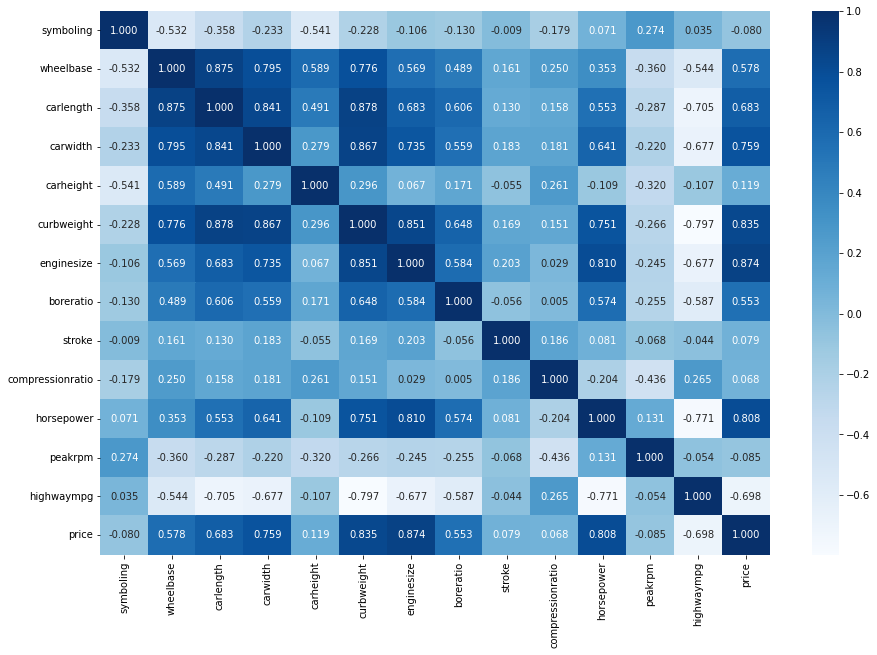

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(cars.corr(),annot=True, cmap='Blues',fmt='.3f')
plt.show()

In [38]:
X = df.drop(['price', 'wheelbase', 'curbweight', 'compressionratio'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("The score is:",lr.score(X_test,y_test))
print("The RMSE for the training set is:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("The RMSE for the testing set is:",np.sqrt(mean_squared_error(y_test, y_test_pred)))

The score is: 0.7599141595449971
The RMSE for the training set is: 2149.915674724877
The RMSE for the testing set is: 4277.762467755098


#### Random Forest

In [39]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
evaluate_regression(clean_evals, rf, "RandomForest Regression", X_train, X_test, y_train, y_test)

Training Error for RandomForest Regression 933.3339508584073 
Test Error for RandomForest Regression 2301.00436149067 
R2 Score for RandomForest Regression Training Set 0.9848691051832795
R2 Score for RandomForest Regression Test Set 0.930534670565542


#### Catboost Regressor

In [40]:
cbr = CatBoostRegressor()
cbr.fit(X_train, y_train)
evaluate_regression(clean_evals, cbr, "CatBoost Regression", X_train, X_test, y_train, y_test)

Learning rate set to 0.030111
0:	learn: 7457.8302422	total: 46.7ms	remaining: 46.7s
1:	learn: 7331.5871225	total: 47.6ms	remaining: 23.8s
2:	learn: 7210.9311203	total: 48.6ms	remaining: 16.2s
3:	learn: 7079.0398163	total: 49.7ms	remaining: 12.4s
4:	learn: 6942.2445787	total: 50.8ms	remaining: 10.1s
5:	learn: 6825.0710169	total: 51.8ms	remaining: 8.59s
6:	learn: 6728.6039449	total: 52.9ms	remaining: 7.5s
7:	learn: 6608.2937808	total: 54.8ms	remaining: 6.8s
8:	learn: 6496.7493171	total: 55.6ms	remaining: 6.13s
9:	learn: 6391.4324753	total: 56.4ms	remaining: 5.59s
10:	learn: 6295.7995072	total: 57.5ms	remaining: 5.17s
11:	learn: 6189.5295906	total: 58.8ms	remaining: 4.84s
12:	learn: 6091.1610747	total: 59.8ms	remaining: 4.54s
13:	learn: 5984.9835692	total: 60.8ms	remaining: 4.28s
14:	learn: 5886.4383878	total: 61.8ms	remaining: 4.06s
15:	learn: 5782.1796775	total: 62.8ms	remaining: 3.87s
16:	learn: 5701.4338363	total: 63.9ms	remaining: 3.69s
17:	learn: 5621.0031586	total: 64.9ms	remaining

#### XGBoost Regressor

In [41]:
xg_r = xg.XGBRegressor().fit(X_train, y_train)
evaluate_regression(clean_evals,xg_r, "XGBOOST Regression", X_train, X_test, y_train, y_test)

[12:09:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Error for XGBOOST Regression 839.7278978382668 
Test Error for XGBOOST Regression 2374.7165069864145 
R2 Score for XGBOOST Regression Training Set 0.9877519303361912
R2 Score for XGBOOST Regression Test Set 0.9260127717011998


#### Note:
* We are getting good results from Random Forest and XGBoost, but we can try to tune the hyperparameters to improve the score.
* We will try to eliminate the multicollinearity by applying PCA first.

### PCA Implementation

In [42]:
ss = StandardScaler()
X_std = ss.fit_transform(X)

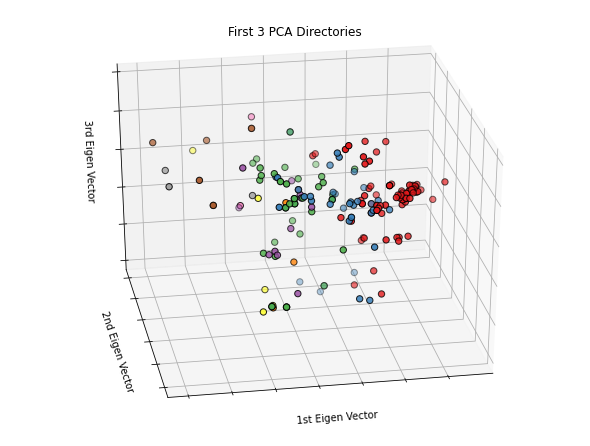

In [43]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=100)

prin = PCA(n_components=3)
prin.fit(X_std)
x_red = prin.transform(X_std)


ax.scatter(x_red[:,0], x_red[:,1] ,x_red[:,2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First 3 PCA Directories")
ax.set_xlabel("1st Eigen Vector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigen Vector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigen Vector")
ax.w_zaxis.set_ticklabels([])
plt.show()

Text(0, 0.5, 'pc2')

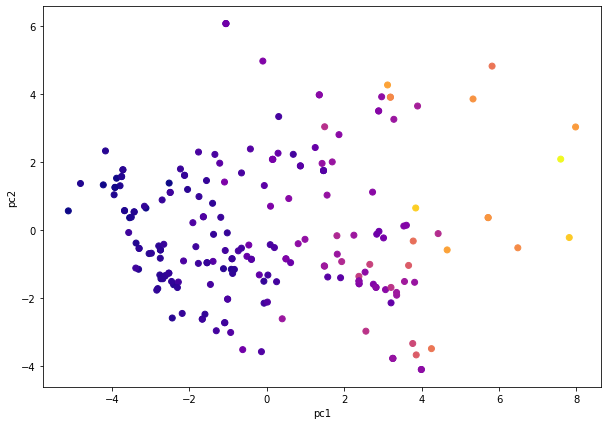

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(x_red[:,0],x_red[:,1],c=df['price'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [45]:
print(prin.components_)

[[-7.44792714e-02  6.11572309e-02  3.08248687e-01  3.03379488e-01
   9.08962954e-02  2.33847110e-01  3.11375065e-01  2.63389873e-01
   1.66984578e-02  2.97879022e-01 -7.39410240e-02 -2.98976185e-01
  -1.03673862e-01  1.03673862e-01  4.33360940e-02  6.41373687e-02
  -1.26199750e-01  5.49772872e-02  3.87668381e-02  3.87738628e-03
  -2.65683803e-01  2.69351695e-01  8.75846591e-02  5.36707962e-02
   8.51525238e-02 -1.87071458e-01  1.08668834e-02  1.59198925e-01
  -1.52053695e-02 -1.00014993e-01 -2.25083142e-01 -1.69624240e-02
   4.73768250e-02  2.67500184e-03  2.39583469e-01 -1.76273434e-02
  -3.91584012e-03]
 [ 3.51939384e-01 -3.77656702e-01 -1.51030586e-01 -5.69491826e-02
  -3.60839612e-01  6.46690443e-02  5.39429596e-02 -3.23031642e-04
  -3.19839575e-02  1.91285027e-01  2.43203411e-01 -1.10395416e-01
   9.57023857e-02 -9.57023857e-02  1.40257707e-01  9.16492263e-02
   2.89742540e-01 -2.49097181e-01 -1.66512545e-01 -5.33055990e-02
  -7.25103273e-02  9.65712743e-02  1.17802697e-01  8.1757

In [46]:
print(x_red.shape)

(205, 3)


#### Random Forest with PCA

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x_red, y, test_size=0.3, random_state=3)

rf_pca = RandomForestRegressor()
rf_pca.fit(X_train, y_train)
evaluate_regression(clean_evals, rf_pca, "RandomForest Regression", X_train, X_test, y_train, y_test)

Training Error for RandomForest Regression 1458.5105256910124 
Test Error for RandomForest Regression 3578.943717304504 
R2 Score for RandomForest Regression Training Set 0.9630504103484729
R2 Score for RandomForest Regression Test Set 0.83194828327576


#### XGBoost with PCA

In [48]:
xg_r_pca = xg.XGBRegressor().fit(X_train, y_train)
evaluate_regression(clean_evals,xg_r_pca, "XGBOOST Regression", X_train, X_test, y_train, y_test)

[12:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training Error for XGBOOST Regression 1152.1618102330306 
Test Error for XGBOOST Regression 3816.6893127300373 
R2 Score for XGBOOST Regression Training Set 0.976942222919155
R2 Score for XGBOOST Regression Test Set 0.8088796933417717


#### Summary

* We did not see an increase in the score after implementing PCA.
* We should try to tune the hyperparameter of the previous results to see if our score can increase further.

### Tuning the Hyperparameters of Random Forest

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [50]:
rf_ht = RandomForestRegressor()
params = {
    'n_estimators': sp_randint(5,100),
    'max_features': sp_randint(1,41),
    'min_samples_leaf': sp_randint(1,24),
    'min_samples_split': sp_randint(2,100)
}

rsearch = RandomizedSearchCV(rf_ht, param_distributions=params, n_iter=100, cv=3, n_jobs=-1, return_train_score=True)
rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f96ba503ee0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f97357907c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f96b439e0d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f96b439ecd0>},
                   return_train_score=True)

In [51]:
rf_ht2 = RandomForestRegressor(**rsearch.best_params_, oob_score=True)
rf_ht2.fit(X_train, y_train)
evaluate_regression(clean_evals,rf_ht2, "Random Forest", X_train, X_test, y_train, y_test)

Training Error for Random Forest 1510.5022896796286 
Test Error for Random Forest 2385.940947278617 
R2 Score for Random Forest Training Set 0.9603691615863129
R2 Score for Random Forest Test Set 0.9253116961152512


In [52]:
evaluate_regression(clean_evals,rf, "Random Forest", X_train, X_test, y_train, y_test)

Training Error for Random Forest 933.3339508584073 
Test Error for Random Forest 2301.00436149067 
R2 Score for Random Forest Training Set 0.9848691051832795
R2 Score for Random Forest Test Set 0.930534670565542


In [54]:
import pickle

In [55]:
pickle.dump(model, open('rf.pkl', 'wb'))